# Preparation

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [ ]:
df = pd.read_excel('train(1).xlsx')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1826 non-null   datetime64[ns]
 1   store   1826 non-null   int64         
 2   item    1826 non-null   int64         
 3   sales   1826 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.2 KB


In [ ]:
df.isnull().any().any()

False

In [ ]:
df['date']

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1821   2017-12-27
1822   2017-12-28
1823   2017-12-29
1824   2017-12-30
1825   2017-12-31
Name: date, Length: 1826, dtype: datetime64[ns]

In [ ]:
df = df[['date', 'sales']]

Text(0, 0.5, 'Sales')

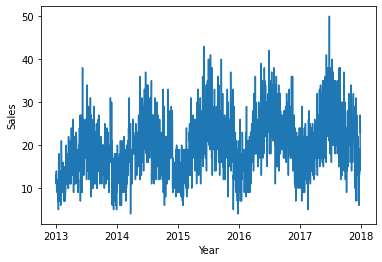

In [ ]:
plt.plot(df['date'], df['sales'])
plt.xlabel('Year')
plt.ylabel('Sales')

In [ ]:
def label_x_y(df, window_size):
  df_numpy = df.to_numpy()
  x = []
  y = []

  for i in range(len(df_numpy)-window_size):
    row = [[a] for a in df_numpy[i:i+window_size]]
    x.append(row)
    label = df_numpy[i+window_size]
    y.append(label)

  return np.array(x), np.array(y)

In [ ]:
windows_size = 14
X, y = label_x_y(df['sales'], windows_size)

In [ ]:
tmp = df.set_index('date')

In [ ]:
start_2013 = tmp.index.searchsorted(dt.datetime(2013, 1, 1))
end_2015 = tmp.index.searchsorted(dt.datetime(2015, 12, 31))

start_2016 = tmp.index.searchsorted(dt.datetime(2016, 1, 1))
end_2016 = tmp.index.searchsorted(dt.datetime(2016, 12, 31))

start_2017 = tmp.index.searchsorted(dt.datetime(2017, 1, 1))
end_2017 = tmp.index.searchsorted(dt.datetime(2017, 12, 31))

x_train, y_train = X[start_2013:end_2015], y[start_2013:end_2015]
x_val, y_val = X[start_2016:end_2016], y[start_2016:end_2016]
x_test, y_test = X[start_2017:end_2017], y[start_2017:end_2017]

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1094, 14, 1), (1094,), (365, 14, 1), (365,), (351, 14, 1), (351,))

In [ ]:
x_train

array([[[13],
        [11],
        [14],
        ...,
        [ 7],
        [10],
        [12]],

       [[11],
        [14],
        [13],
        ...,
        [10],
        [12],
        [ 5]],

       [[14],
        [13],
        [10],
        ...,
        [12],
        [ 5],
        [ 7]],

       ...,

       [[ 4],
        [12],
        [15],
        ...,
        [12],
        [16],
        [26]],

       [[12],
        [15],
        [18],
        ...,
        [16],
        [26],
        [ 7]],

       [[15],
        [18],
        [21],
        ...,
        [26],
        [ 7],
        [13]]])

In [ ]:
y_train

array([ 5,  7, 16, ...,  7, 13,  9])

In [ ]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

#LSTM

Saved model = https://drive.google.com/drive/folders/1joqlVxhlIrFAMmFwputVbIJHxozghzEl?usp=share_link

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
model1 = Sequential()
model1.add(InputLayer((14,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss='mape', optimizer = Adam(learning_rate = 0.01), metrics=['mape'])

In [ ]:
history = model1.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, callbacks=[cp])

Epoch 1/100
25/35 [====================>.........] - ETA: 0s - loss: 46.4956 - mape: 46.4956

35/35 [==============================] - 11s 124ms/step - loss: 42.1761 - mape: 42.1761 - val_loss: 31.1484 - val_mape: 31.1484
Epoch 2/100
26/35 [=====================>........] - ETA: 0s - loss: 30.8610 - mape: 30.8610

35/35 [==============================] - 7s 220ms/step - loss: 30.2302 - mape: 30.2302 - val_loss: 30.7876 - val_mape: 30.7876
Epoch 3/100
33/35 [===========================>..] - ETA: 0s - loss: 30.2053 - mape: 30.2053

35/35 [==============================] - 7s 195ms/step - loss: 30.0960 - mape: 30.0960 - val_loss: 27.0013 - val_mape: 27.0013
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 28.7666 - mape: 28.7666 - val_loss: 27.5768 - val_mape: 27.5768
Epoch 5/100
24/35 [===================>..........] - ETA: 0s - loss: 27.3868 - mape: 27.3868

35/35 [==============================] - 4s 104ms/step - loss: 27.1281 - mape: 27.1281 - val_loss: 23.7566 - val_mape: 23.7566
Epoch 6/100
25/35 [====================>.........] - ETA: 0s - loss: 26.8510 - mape: 26.8510

35/35 [==============================] - 5s 136ms/step - loss: 26.4274 - mape: 26.4274 - val_loss: 23.6301 - val_mape: 23.6301
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 26.2144 - mape: 26.2144 - val_loss: 25.5242 - val_mape: 25.5242
Epoch 8/100
28/35 [=======================>......] - ETA: 0s - loss: 26.1528 - mape: 26.1528

35/35 [==============================] - 8s 231ms/step - loss: 25.7845 - mape: 25.7845 - val_loss: 22.9225 - val_mape: 22.9225
Epoch 9/100
35/35 [==============================] - 0s 9ms/step - loss: 26.9757 - mape: 26.9757 - val_loss: 23.2416 - val_mape: 23.2416
Epoch 10/100
35/35 [==============================] - 0s 12ms/step - loss: 25.9327 - mape: 25.9327 - val_loss: 24.6072 - val_mape: 24.6072
Epoch 11/100
35/35 [==============================] - 0s 11ms/step - loss: 25.8645 - mape: 25.8645 - val_loss: 23.4338 - val_mape: 23.4338
Epoch 12/100
31/35 [=========================>....] - ETA: 0s - loss: 25.4744 - mape: 25.4744

35/35 [==============================] - 4s 116ms/step - loss: 25.4706 - mape: 25.4706 - val_loss: 22.5224 - val_mape: 22.5224
Epoch 13/100
35/35 [==============================] - 0s 6ms/step - loss: 24.8856 - mape: 24.8856 - val_loss: 23.8804 - val_mape: 23.8804
Epoch 14/100
35/35 [==============================] - 0s 6ms/step - loss: 25.3969 - mape: 25.3969 - val_loss: 22.7947 - val_mape: 22.7947
Epoch 15/100
35/35 [==============================] - 0s 5ms/step - loss: 24.9780 - mape: 24.9780 - val_loss: 22.9184 - val_mape: 22.9184
Epoch 16/100
35/35 [==============================] - 0s 5ms/step - loss: 25.0963 - mape: 25.0963 - val_loss: 23.5404 - val_mape: 23.5404
Epoch 17/100
35/35 [==============================] - 0s 7ms/step - loss: 25.8573 - mape: 25.8573 - val_loss: 23.9995 - val_mape: 23.9995
Epoch 18/100
35/35 [==============================] - 0s 6ms/step - loss: 25.6844 - mape: 25.6844 - val_loss: 24.2594 - val_mape: 24.2594
Epoch 19/100
35/35 [=========================

35/35 [==============================] - 4s 115ms/step - loss: 25.2617 - mape: 25.2617 - val_loss: 22.3578 - val_mape: 22.3578
Epoch 23/100
35/35 [==============================] - 0s 6ms/step - loss: 25.4020 - mape: 25.4020 - val_loss: 23.2171 - val_mape: 23.2171
Epoch 24/100
35/35 [==============================] - 0s 5ms/step - loss: 25.2718 - mape: 25.2718 - val_loss: 26.8433 - val_mape: 26.8433
Epoch 25/100
35/35 [==============================] - 0s 6ms/step - loss: 24.9913 - mape: 24.9913 - val_loss: 22.6786 - val_mape: 22.6786
Epoch 26/100
27/35 [======================>.......] - ETA: 0s - loss: 24.1232 - mape: 24.1232

35/35 [==============================] - 3s 103ms/step - loss: 24.5433 - mape: 24.5433 - val_loss: 21.7866 - val_mape: 21.7866
Epoch 27/100
35/35 [==============================] - 0s 6ms/step - loss: 24.4263 - mape: 24.4263 - val_loss: 22.0058 - val_mape: 22.0058
Epoch 28/100
35/35 [==============================] - 0s 6ms/step - loss: 25.2782 - mape: 25.2782 - val_loss: 22.5917 - val_mape: 22.5917
Epoch 29/100
35/35 [==============================] - 0s 5ms/step - loss: 24.6791 - mape: 24.6791 - val_loss: 21.9418 - val_mape: 21.9418
Epoch 30/100
35/35 [==============================] - 0s 6ms/step - loss: 24.4768 - mape: 24.4768 - val_loss: 22.2200 - val_mape: 22.2200
Epoch 31/100
35/35 [==============================] - 0s 5ms/step - loss: 24.9317 - mape: 24.9317 - val_loss: 23.2660 - val_mape: 23.2660
Epoch 32/100
35/35 [==============================] - 0s 5ms/step - loss: 24.5250 - mape: 24.5250 - val_loss: 22.1217 - val_mape: 22.1217
Epoch 33/100
35/35 [=========================

35/35 [==============================] - 4s 114ms/step - loss: 24.4054 - mape: 24.4054 - val_loss: 21.6380 - val_mape: 21.6380
Epoch 38/100
25/35 [====================>.........] - ETA: 0s - loss: 24.8252 - mape: 24.8252

35/35 [==============================] - 3s 103ms/step - loss: 24.5825 - mape: 24.5825 - val_loss: 21.6370 - val_mape: 21.6370
Epoch 39/100
35/35 [==============================] - 0s 6ms/step - loss: 24.4499 - mape: 24.4499 - val_loss: 21.8084 - val_mape: 21.8084
Epoch 40/100
35/35 [==============================] - 0s 6ms/step - loss: 25.6519 - mape: 25.6519 - val_loss: 21.6854 - val_mape: 21.6854
Epoch 41/100
35/35 [==============================] - 0s 6ms/step - loss: 24.3973 - mape: 24.3973 - val_loss: 22.2748 - val_mape: 22.2748
Epoch 42/100
35/35 [==============================] - 0s 7ms/step - loss: 24.1293 - mape: 24.1293 - val_loss: 22.4892 - val_mape: 22.4892
Epoch 43/100
35/35 [==============================] - 0s 6ms/step - loss: 24.2630 - mape: 24.2630 - val_loss: 21.9329 - val_mape: 21.9329
Epoch 44/100
35/35 [==============================] - 0s 6ms/step - loss: 23.9519 - mape: 23.9519 - val_loss: 22.1905 - val_mape: 22.1905
Epoch 45/100
35/35 [=========================

35/35 [==============================] - 4s 116ms/step - loss: 24.0238 - mape: 24.0238 - val_loss: 21.3487 - val_mape: 21.3487
Epoch 50/100
35/35 [==============================] - 0s 7ms/step - loss: 24.1738 - mape: 24.1738 - val_loss: 21.6804 - val_mape: 21.6804
Epoch 51/100
35/35 [==============================] - 0s 5ms/step - loss: 24.1339 - mape: 24.1339 - val_loss: 21.6715 - val_mape: 21.6715
Epoch 52/100
35/35 [==============================] - 0s 6ms/step - loss: 24.6896 - mape: 24.6896 - val_loss: 21.7777 - val_mape: 21.7777
Epoch 53/100
35/35 [==============================] - 0s 6ms/step - loss: 24.1529 - mape: 24.1529 - val_loss: 24.6254 - val_mape: 24.6254
Epoch 54/100
35/35 [==============================] - 0s 5ms/step - loss: 24.9243 - mape: 24.9243 - val_loss: 22.4271 - val_mape: 22.4271
Epoch 55/100
35/35 [==============================] - 0s 7ms/step - loss: 24.0518 - mape: 24.0518 - val_loss: 21.9789 - val_mape: 21.9789
Epoch 56/100
35/35 [=========================

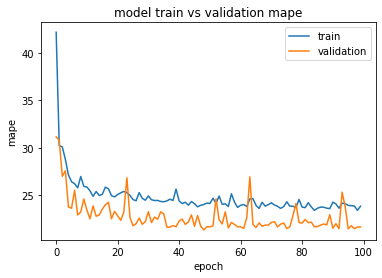

In [ ]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model train vs validation mape')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_prediction_1 = model1.predict(x_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction':train_prediction_1, 'Actuals':y_train})
train_results

35/35 [==============================] - 0s 2ms/step


,Train Prediction,Actuals
0,11.843151,5
1,10.832754,7
2,11.222423,16
3,12.466780,7
4,11.074066,18
...,...,...
1089,13.467474,16
1090,13.137918,26
1091,14.192890,7
1092,12.279312,13


In [ ]:
val_prediction_1 = model1.predict(x_val).flatten()
test_prediction_1 = model1.predict(x_test).flatten()

11/11 [==============================] - 0s 2ms/step


In [ ]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [ ]:
print('MAPE of LSTM:\n')
print('Training',MAPE(y_train, train_prediction_1))
print('Validation',MAPE(y_val, val_prediction_1))
print('Testing',MAPE(y_test, test_prediction_1))

MAPE of LSTM:

Training 23.882155827291133
Validation 21.34868000314689
Testing 23.14168930415251


Text(0.5, 1.0, 'LSTM testing result')

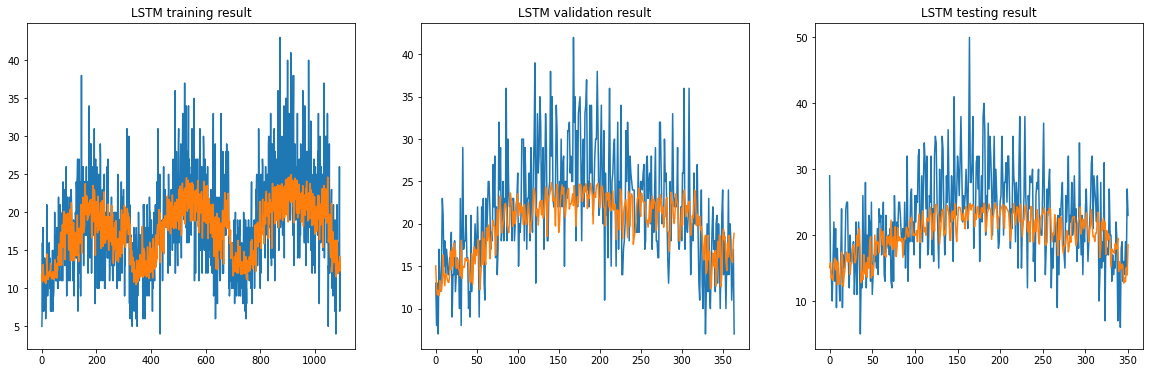

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(y_train)
plt.plot(train_prediction_1)
plt.title('LSTM training result')

plt.subplot(1,3,2)
plt.plot(y_val)
plt.plot(val_prediction_1)
plt.title('LSTM validation result')

plt.subplot(1,3,3)
plt.plot(y_test)
plt.plot(test_prediction_1)
plt.title('LSTM testing result')

## Generating forecast by LSTM (forecast period = 30 days)

In [ ]:
last_14_days_test_set = np.array(df.sales.tail(14)).reshape(1,14,1) # period: last 2 week of December 2017
last_14_days_test_set

array([[[19],
        [ 7],
        [16],
        [12],
        [ 6],
        [18],
        [19],
        [13],
        [16],
        [14],
        [19],
        [15],
        [27],
        [23]]])

In [ ]:
list_temp_data = list(last_14_days_test_set.reshape(14)) # for storing all (temp) sales
array_temp_last_14_days = last_14_days_test_set.copy() # for storing the new last 14 days sales in every iteration

# generate forecast for January 1 - January 31, 2018
for i in range(31):
  # starting point: generate forecast based on last 14 days in December, 2017
  list_temp_data.extend(model1.predict(array_temp_last_14_days).flatten())

  array_temp_last_14_days = []
  array_temp_last_14_days = np.array(list_temp_data[-14:]).reshape(1,14,1)

  # on the next iteration: generate forecast based on new last 14 days

1/1 [==============================] - 0s 28ms/step


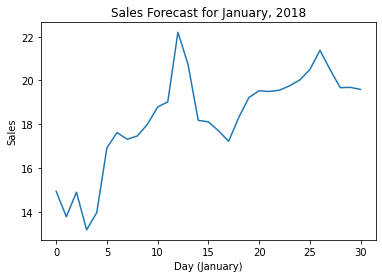

In [ ]:
plt.plot(list_temp_data[14:])
plt.xlabel('Day (January)')
plt.ylabel('Sales')
plt.title('Sales Forecast for January, 2018')
plt.show()

<Figure size 2160x720 with 0 Axes>

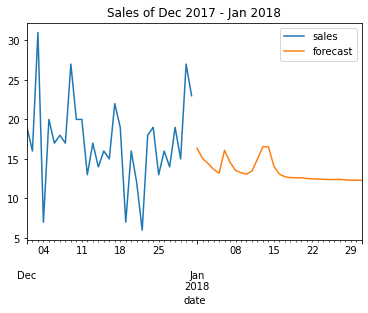

In [ ]:
test = pd.read_csv('test.csv')
test.date = pd.to_datetime(test.date, format='%Y-%m-%d')

new_df = df.copy()
for i in range(31):
  new_df = new_df.append({'date':test.iloc[i, 1],'forecast':list_temp_data[14+i]}, ignore_index=True)

plt.figure(figsize=(30,10))
new_df[-62:].plot(x='date', y=['sales', 'forecast'])
plt.title('Sales of Dec 2017 - Jan 2018')
plt.show()

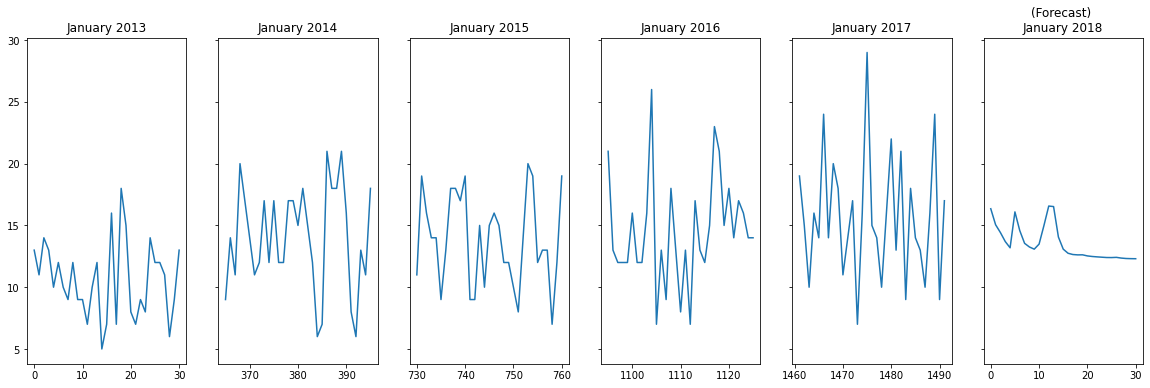

In [ ]:
fig, ax = plt.subplots(1, 6, sharex=False, sharey=True, figsize=(20, 6))

# plt.subplot(1,6,1)
ax[0].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2013), 'sales'])
ax[0].title.set_text('January 2013')

# plt.subplot(1,6,2)
ax[1].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2014), 'sales'])
ax[1].title.set_text('January 2014')

# plt.subplot(1,6,3)
ax[2].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2015), 'sales'])
ax[2].title.set_text('January 2015')

# plt.subplot(1,6,4)
ax[3].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2016), 'sales'])
ax[3].title.set_text('January 2016')

# plt.subplot(1,6,5)
ax[4].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2017), 'sales'])
ax[4].title.set_text('January 2017')

# plt.subplot(1,6,6)
ax[5].plot(list_temp_data[14:])
ax[5].title.set_text('(Forecast) \nJanuary 2018')

plt.show()

# SimpleRNN

source:
https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

saved model RNN: https://drive.google.com/drive/folders/14xnJQtwvE9XqsE-lvum4Mf5AFY1DdFLs?usp=share_link

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error

def create_RNN(hidden_units, dense_units, input_shape):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape))
    model.add(Dense(units=dense_units))
    model.compile(loss='mape', optimizer='adam', metrics=['mape'] )
    return model

In [ ]:
model2 = create_RNN(hidden_units=128, dense_units=1, input_shape=(5,1))
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, 128)               16640     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
history = model2.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, callbacks=[cp2])

Epoch 1/100
35/35 [==============================] - 3s 55ms/step - loss: 57.9724 - mape: 57.9724 - val_loss: 41.9085 - val_mape: 41.9085
Epoch 2/100
35/35 [==============================] - 1s 39ms/step - loss: 32.1345 - mape: 32.1345 - val_loss: 32.0973 - val_mape: 32.0973
Epoch 3/100
35/35 [==============================] - 1s 40ms/step - loss: 28.6453 - mape: 28.6453 - val_loss: 28.3984 - val_mape: 28.3984
Epoch 4/100
35/35 [==============================] - 1s 41ms/step - loss: 27.6781 - mape: 27.6781 - val_loss: 26.8664 - val_mape: 26.8664
Epoch 5/100
35/35 [==============================] - 1s 40ms/step - loss: 26.9053 - mape: 26.9053 - val_loss: 25.4204 - val_mape: 25.4204
Epoch 6/100
35/35 [==============================] - 2s 50ms/step - loss: 26.8225 - mape: 26.8225 - val_loss: 25.3889 - val_mape: 25.3889
Epoch 7/100
35/35 [==============================] - 1s 42ms/step - loss: 26.7157 - mape: 26.7157 - val_loss: 24.5616 - val_mape: 24.5616
Epoch 8/100
35/35 [===============

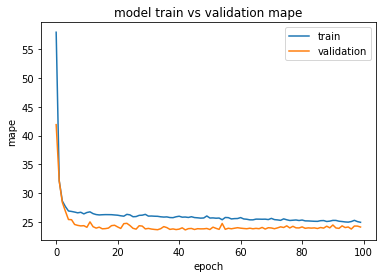

In [ ]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model train vs validation mape')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [ ]:
train_prediction_2 = model2.predict(x_train).flatten()
val_prediction_2 = model2.predict(x_val).flatten()
test_prediction_2 = model2.predict(x_test).flatten()

12/12 [==============================] - 0s 2ms/step


In [ ]:
print('MAPE of SimpleRNN:\n')
print('Training',MAPE(y_train, train_prediction_2))
print('Validation',MAPE(y_val, val_prediction_2))
print('Testing',MAPE(y_test, test_prediction_2))

MAPE of SimpleRNN:

Training 25.706320159780642
Validation 23.61284413565021
Testing 26.72551885827554


Text(0.5, 1.0, 'SimpleRNN testing result')

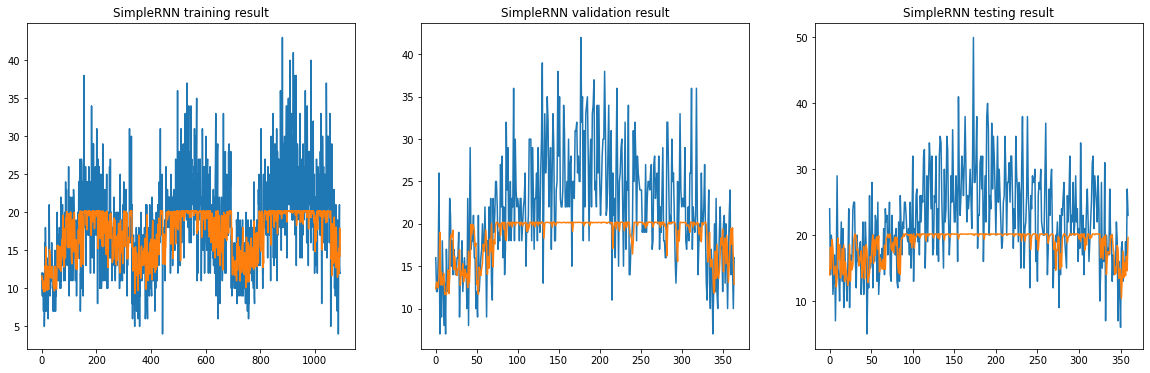

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(y_train)
plt.plot(train_prediction_2)
plt.title('SimpleRNN training result')

plt.subplot(1,3,2)
plt.plot(y_val)
plt.plot(val_prediction_2)
plt.title('SimpleRNN validation result')

plt.subplot(1,3,3)
plt.plot(y_test)
plt.plot(test_prediction_2)
plt.title('SimpleRNN testing result')

# SimpleRNN window size = 14 days

saved model RNN (window=14) https://drive.google.com/drive/folders/14gLDuGAbR6JablkxfwXcOYt14m6bXFhz?usp=share_link

In [ ]:
model3 = create_RNN(hidden_units=128, dense_units=1, input_shape=(14,1))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
history = model3.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, callbacks=[cp3])

Epoch 1/100
35/35 [==============================] - 4s 76ms/step - loss: 67.4516 - mape: 67.4516 - val_loss: 44.6394 - val_mape: 44.6394
Epoch 2/100
35/35 [==============================] - 2s 55ms/step - loss: 32.3242 - mape: 32.3242 - val_loss: 31.7208 - val_mape: 31.7208
Epoch 3/100
35/35 [==============================] - 2s 57ms/step - loss: 29.9097 - mape: 29.9097 - val_loss: 29.9348 - val_mape: 29.9348
Epoch 4/100
35/35 [==============================] - 2s 56ms/step - loss: 28.3508 - mape: 28.3508 - val_loss: 27.5515 - val_mape: 27.5515
Epoch 5/100
35/35 [==============================] - 2s 73ms/step - loss: 27.2797 - mape: 27.2797 - val_loss: 25.7847 - val_mape: 25.7847
Epoch 6/100
35/35 [==============================] - 2s 55ms/step - loss: 26.6196 - mape: 26.6196 - val_loss: 25.0654 - val_mape: 25.0654
Epoch 7/100
35/35 [==============================] - 2s 51ms/step - loss: 26.7693 - mape: 26.7693 - val_loss: 23.3993 - val_mape: 23.3993
Epoch 8/100
35/35 [===============

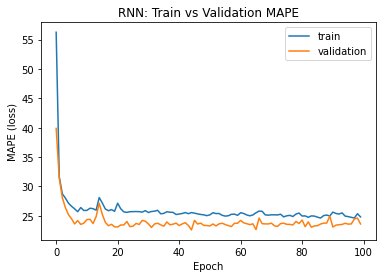

In [ ]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('RNN: Train vs Validation MAPE')
plt.ylabel('MAPE (loss)')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
model3 = load_model('model3/')

In [ ]:
train_prediction_3 = model3.predict(x_train).flatten()
val_prediction_3 = model3.predict(x_val).flatten()
test_prediction_3 = model3.predict(x_test).flatten()

11/11 [==============================] - 0s 3ms/step


In [ ]:
print('MAPE of SimpleRNN:\n')
print('Training',MAPE(y_train, train_prediction_3))
print('Validation',MAPE(y_val, val_prediction_3))
print('Testing',MAPE(y_test, test_prediction_3))

MAPE of SimpleRNN:

Training 25.22366004329873
Validation 22.80693056672135
Testing 25.354873022736403


Text(0.5, 1.0, 'SimpleRNN testing result')

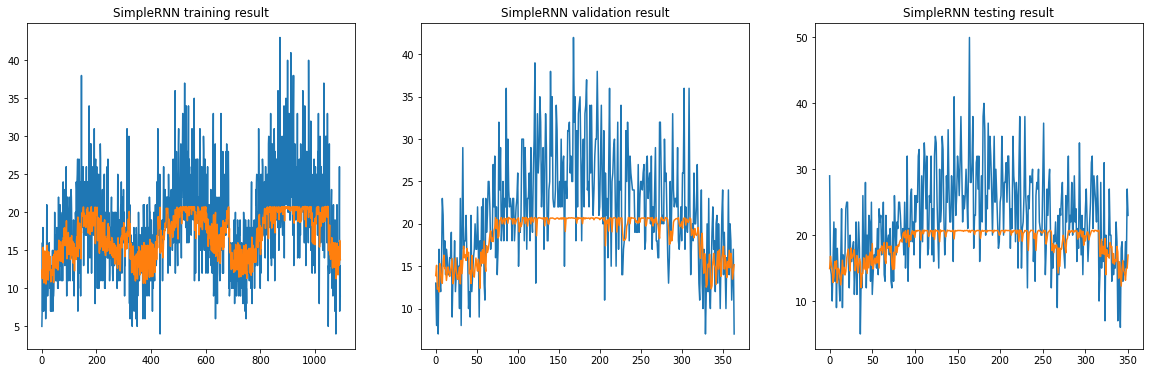

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(y_train)
plt.plot(train_prediction_3)
plt.title('SimpleRNN training result')

plt.subplot(1,3,2)
plt.plot(y_val)
plt.plot(val_prediction_3)
plt.title('SimpleRNN validation result')

plt.subplot(1,3,3)
plt.plot(y_test)
plt.plot(test_prediction_3)
plt.title('SimpleRNN testing result')

## Generating forecast by SimpleRNN (forecast period = 30 days)

In [ ]:
last_14_days_test_set = np.array(df.sales.tail(14)).reshape(1,14,1) # period: last 2 week of December 2017
last_14_days_test_set

array([[[19],
        [ 7],
        [16],
        [12],
        [ 6],
        [18],
        [19],
        [13],
        [16],
        [14],
        [19],
        [15],
        [27],
        [23]]])

In [ ]:
list_temp_data = list(last_14_days_test_set.reshape(14)) # for storing all (temp) sales
array_temp_last_14_days = last_14_days_test_set.copy() # for storing the new last 5 days sales in every iteration

# generate forecast for January 1 - January 31, 2018
for i in range(31):
  # starting point: generate forecast based on last 14 days in December, 2017
  list_temp_data.extend(model3.predict(array_temp_last_14_days).flatten())

  array_temp_last_14_days = []
  array_temp_last_14_days = np.array(list_temp_data[-14:]).reshape(1,14,1)
  # print(array_temp_last_14_days)
  # print('DAY:',i)

  # on the next iteration: generate forecast based on new last 14 days

1/1 [==============================] - 0s 16ms/step


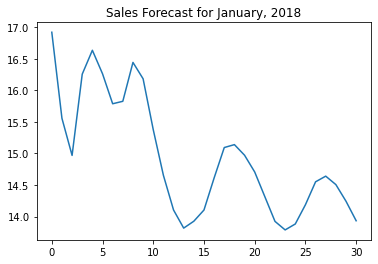

In [ ]:
plt.plot(list_temp_data[14:])
plt.title('Sales Forecast for January, 2018')
plt.show()

<Figure size 2160x720 with 0 Axes>

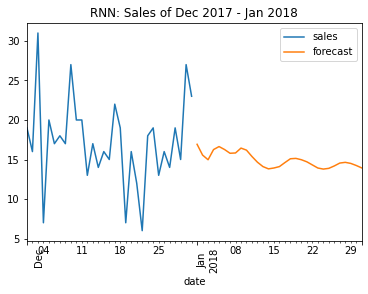

In [ ]:
test = pd.read_csv('test.csv')
test.date = pd.to_datetime(test.date, format='%Y-%m-%d')

new_df = df.copy()
for i in range(31):
  new_df = new_df.append({'date':test.iloc[i, 1],'forecast':list_temp_data[14+i]}, ignore_index=True)

plt.figure(figsize=(30,10))
new_df[-62:].plot(x='date', y=['sales', 'forecast'])
plt.xticks(rotation=90)
plt.title('RNN: Sales of Dec 2017 - Jan 2018')
plt.show()

<Figure size 2160x720 with 0 Axes>

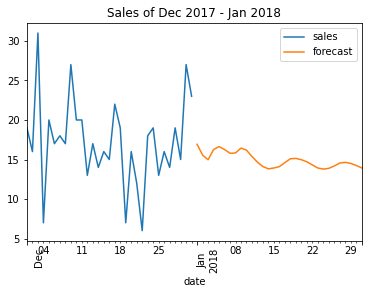

In [ ]:
test = pd.read_csv('test.csv')
test.date = pd.to_datetime(test.date, format='%Y-%m-%d')

new_df = df.copy()
for i in range(31):
  new_df = new_df.append({'date':test.iloc[i, 1],'forecast':list_temp_data[14+i]}, ignore_index=True)

plt.figure(figsize=(30,10))
new_df[-62:].plot(x='date', y=['sales', 'forecast'])
plt.xticks(rotation=90)
plt.title('Sales of Dec 2017 - Jan 2018')
plt.show()

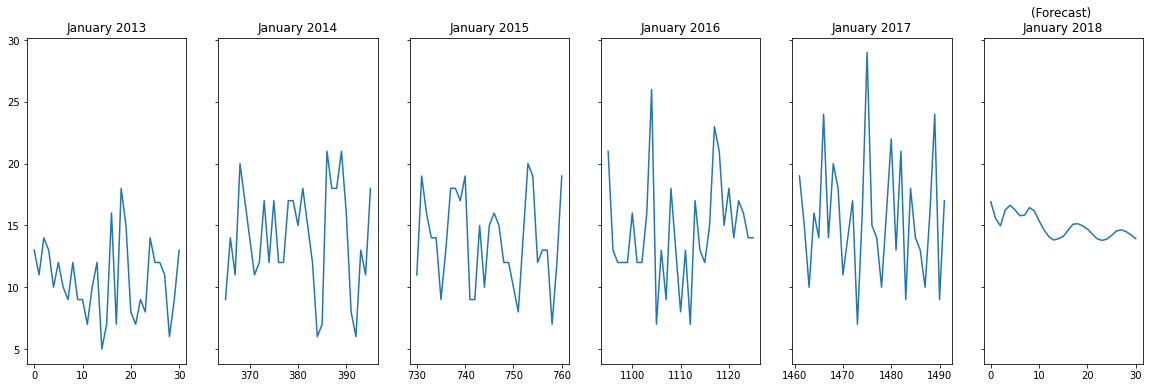

In [ ]:
fig, ax = plt.subplots(1, 6, sharex=False, sharey=True, figsize=(20, 6))

# plt.subplot(1,6,1)
ax[0].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2013), 'sales'])
ax[0].title.set_text('January 2013')

# plt.subplot(1,6,2)
ax[1].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2014), 'sales'])
ax[1].title.set_text('January 2014')

# plt.subplot(1,6,3)
ax[2].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2015), 'sales'])
ax[2].title.set_text('January 2015')

# plt.subplot(1,6,4)
ax[3].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2016), 'sales'])
ax[3].title.set_text('January 2016')

# plt.subplot(1,6,5)
ax[4].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2017), 'sales'])
ax[4].title.set_text('January 2017')

# plt.subplot(1,6,6)
ax[5].plot(list_temp_data[14:])
ax[5].title.set_text('(Forecast) \nJanuary 2018')

plt.show()

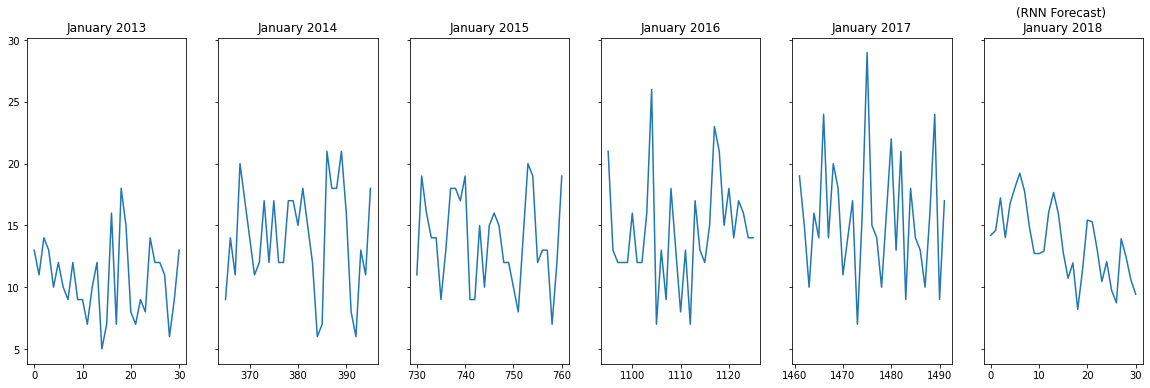

In [ ]:
fig, ax = plt.subplots(1, 6, sharex=False, sharey=True, figsize=(20, 6))

# plt.subplot(1,6,1)
ax[0].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2013), 'sales'])
ax[0].title.set_text('January 2013')

# plt.subplot(1,6,2)
ax[1].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2014), 'sales'])
ax[1].title.set_text('January 2014')

# plt.subplot(1,6,3)
ax[2].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2015), 'sales'])
ax[2].title.set_text('January 2015')

# plt.subplot(1,6,4)
ax[3].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2016), 'sales'])
ax[3].title.set_text('January 2016')

# plt.subplot(1,6,5)
ax[4].plot(df.loc[(df['date'].dt.month == 1) & (df['date'].dt.year == 2017), 'sales'])
ax[4].title.set_text('January 2017')

# plt.subplot(1,6,6)
ax[5].plot(list_temp_data[14:])
ax[5].title.set_text('(RNN Forecast) \nJanuary 2018')

plt.show()

#SARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_excel('train(1).xlsx')

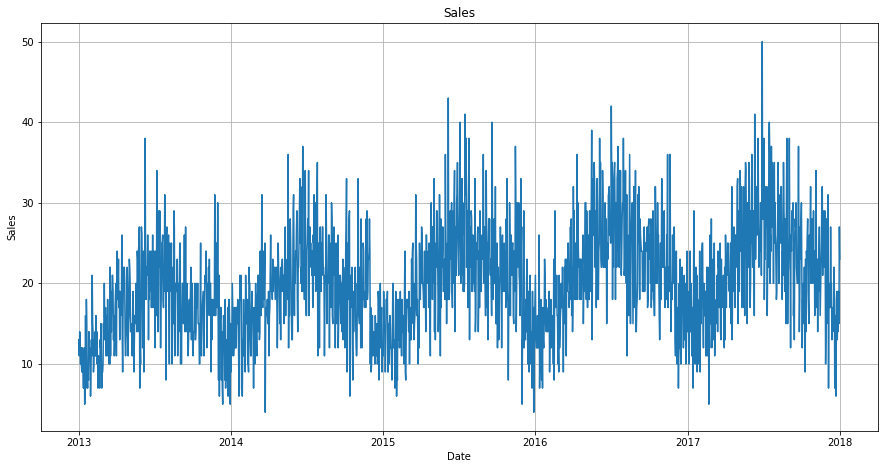

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['date'], data['sales'])
plt.title('Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

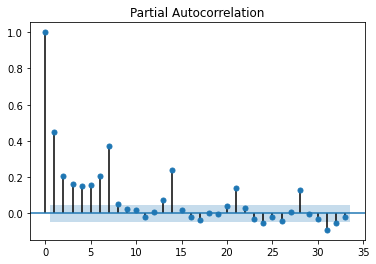

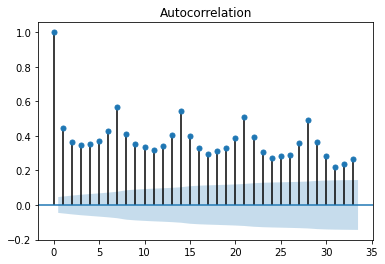

In [ ]:
plot_pacf(data['sales']);
plot_acf(data['sales']);

In [ ]:
ad_fuller_result = adfuller(data['sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.157670556332798
p-value: 0.02256938062657191


In [ ]:
# data['sales'] = np.log(data['sales'])
# data['sales'] = data['sales'].diff()
# data = data.drop(data.index[0])

In [ ]:
# plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
# plt.plot(data['sales'][0:100])
# plt.title("Log Difference of Sales")
# plt.show()

In [ ]:
# ad_fuller_result = adfuller(data['sales'])
# print(f'ADF Statistic: {ad_fuller_result[0]}')
# print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
# plot_pacf(data['sales']);
# plot_acf(data['sales']);

In [ ]:
# def optimize_SARIMA(parameters_list, d, D, s, exog):
#     results = []

#     for param in tqdm_notebook(parameters_list):
#         try:
#             model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
#         except:
#             continue

#         aic = model.aic
#         results.append([param, aic])

#     result_df = pd.DataFrame(results)
#     result_df.columns = ['(p,q)x(P,Q)', 'AIC']
#     #Sort in ascending order, lower AIC is better
#     result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

#     return result_df

In [ ]:
# p = range(0, 7, 1)
# d = 1
# q = range(0, 7, 1)
# P = range(0, 7, 1)
# D = 1
# Q = range(0, 7, 1)
# s = 4
# parameters = product(p, q, P, Q)
# parameters_list = list(parameters)
# print(len(parameters_list))

In [ ]:
# result_df = optimize_SARIMA(parameters_list, 1, 1, 4, data['sales'])
# result_df

In [ ]:
best_model_training = SARIMAX(data['sales'][start_2013:end_2015], order=(1, 1, 0), seasonal_order=(1, 1, 1, 7)).fit(dis=-1)
best_model_validation = SARIMAX(data['sales'][start_2016:end_2016], order=(1, 1, 0), seasonal_order=(1, 1, 1, 7)).fit(dis=-1)
best_model_tes = SARIMAX(data['sales'][start_2017:end_2017], order=(1, 1, 0), seasonal_order=(1, 1, 1, 7)).fit(dis=-1)
print(best_model_training.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1094
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 7)   Log Likelihood               -3368.390
Date:                             Wed, 14 Dec 2022   AIC                           6744.780
Time:                                     10:17:07   BIC                           6764.741
Sample:                                          0   HQIC                          6752.336
                                            - 1094                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4801      0.027    -17.482      0.000      -0.534      -0.426
ar.S.L7        0.0662      

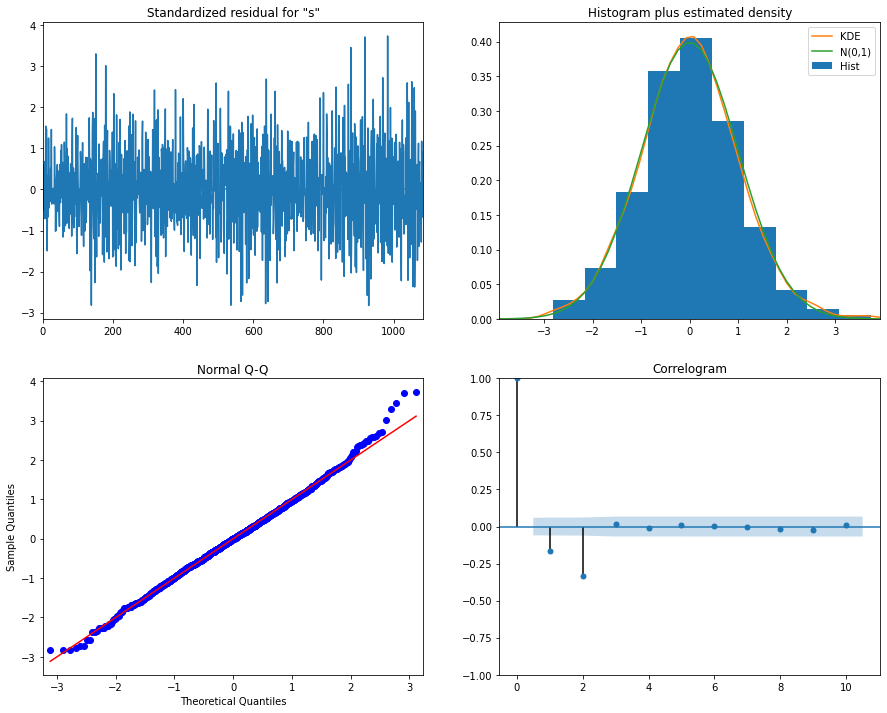

In [ ]:
best_model_training.plot_diagnostics(figsize=(15,12));

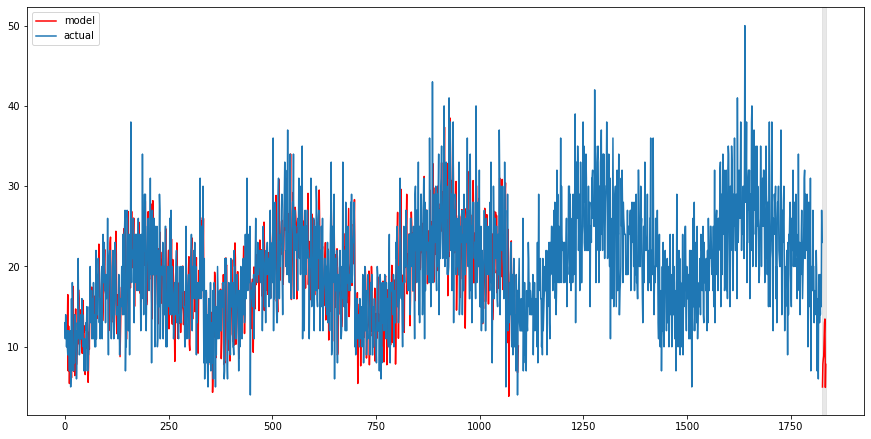

In [ ]:
data['arima_model'] = best_model_training.fittedvalues
data['arima_model'][:4+1] = np.NaN
forecast = best_model_training.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['sales'], label='actual')
plt.legend()
plt.show()

In [ ]:
predictions_ARIMA = data['arima_model']
predictions_ARIMA

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1821    16.531150
1822    15.976341
1823    18.064603
1824    19.981573
1825    23.232886
Name: arima_model, Length: 1826, dtype: float64

In [ ]:
data['arima_model']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1821    16.531150
1822    15.976341
1823    18.064603
1824    19.981573
1825    23.232886
Name: arima_model, Length: 1826, dtype: float64

In [ ]:
data['sales']

0       13
1       11
2       14
3       13
4       10
        ..
1821    14
1822    19
1823    15
1824    27
1825    23
Name: sales, Length: 1826, dtype: int64

In [ ]:
df_forecasst = pd.concat([data['sales'], data['arima_model']], axis=1)

In [ ]:
df_forecasst.dropna(inplace = True)

In [ ]:
df_forecasst

,sales,arima_model
5,12,9.999979
6,10,12.000045
7,9,16.500100
8,12,7.000580
9,9,12.582776
...,...,...
1821,14,16.531150
1822,19,15.976341
1823,15,18.064603
1824,27,19.981573


In [ ]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [ ]:
MAPE(data['sales'], data['arima_model'])

24.682860699401907

In [ ]:
data['arima_model_validation'] = best_model_validation.fittedvalues
data['arima_model_validation'][:4+1] = np.NaN
forecast = best_model_validation.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data['arima_model_validation'].append(forecast)

In [ ]:
data['arima_model_tes'] = best_model_tes.fittedvalues
data['arima_model_tes'][:4+1] = np.NaN
forecast = best_model_tes.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data['arima_model_tes'].append(forecast)

In [ ]:
print('MAPE of SARIMA:\n')
print('Training',MAPE(data['sales'][start_2013:end_2015], data['arima_model']))
print('Validation',MAPE(data['sales'][start_2016:end_2016], data['arima_model_validation']))
print('Testing',MAPE(data['sales'][start_2017:end_2017], data['arima_model_tes']))

MAPE of SARIMA:

Training 25.854515995247695
Validation 23.426641735677446
Testing 24.81591821230019
